Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read Data

In [41]:
file = pd.ExcelFile("../../data/v7/Handballprojekt_2Liga_14.01.2023.xlsx")

file.sheet_names

df = file.parse('2. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


Cleanup & Renaming

In [42]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,Noah Beyer,10.0,5.0,3.0,1.0,NaN,1.0,3.0,NaN,Bochmann,192.0,180.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,Noah Beyer,15.0,8.0,4.0,1.0,NaN,1.0,9.0,NaN,Bochmann,192.0,180.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,Noah Beyer,34.0,15.0,14.0,0.0,NaN,1.0,2.0,NaN,Petursson,185.0,180.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,Noah Beyer,39.0,18.0,17.0,1.0,NaN,1.0,8.0,NaN,Petursson,185.0,180.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,Noah Beyer,43.0,19.0,19.0,1.0,NaN,1.0,7.0,NaN,Petursson,185.0,180.0,0.0,5.0,8.0,1.0


Teamwise Throw stats

                 homeTeam  TotatlThrows  SuccessfulThrows  FailedThrows  \
14   VfL Lübeck-Schwartau            19                17             2   
0       AV Hamm-Westfalen             8                 7             1   
3     HSG Nordhorn-Lingen            14                12             1   
10           TuS Ferndorf            11                 9             1   
15         Wölfe Würzburg            10                 8             1   
2                 EHV Aue             9                 7             1   
5             TUSEM Essen            46                33             5   
1   Dessau-Roßlauer HV 06             9                 6             2   
6     TV 05/07 Hüttenberg             6                 4             1   
9           ThSV Eisenach            42                25             5   
7            TV Emsdetten            44                26             4   
8        TV Großwallstadt             6                 3             1   
11            Tusem Essen

[Text(0, 0, '20'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '50'),
 Text(0, 0, '59.0909'),
 Text(0, 0, '59.5238'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '66.6667'),
 Text(0, 0, '71.7391'),
 Text(0, 0, '77.7778'),
 Text(0, 0, '80'),
 Text(0, 0, '81.8182'),
 Text(0, 0, '85.7143'),
 Text(0, 0, '87.5'),
 Text(0, 0, '89.4737')]

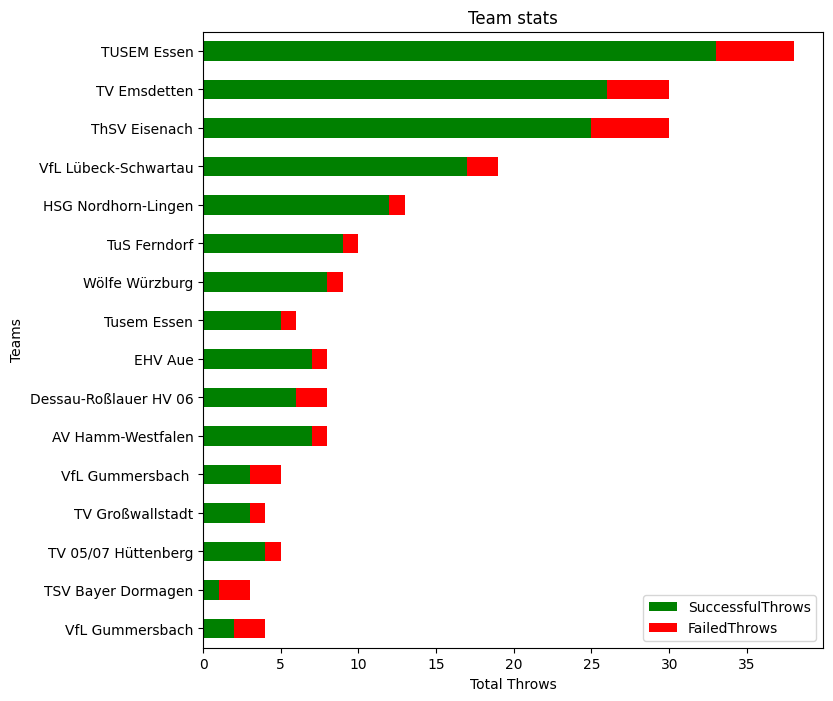

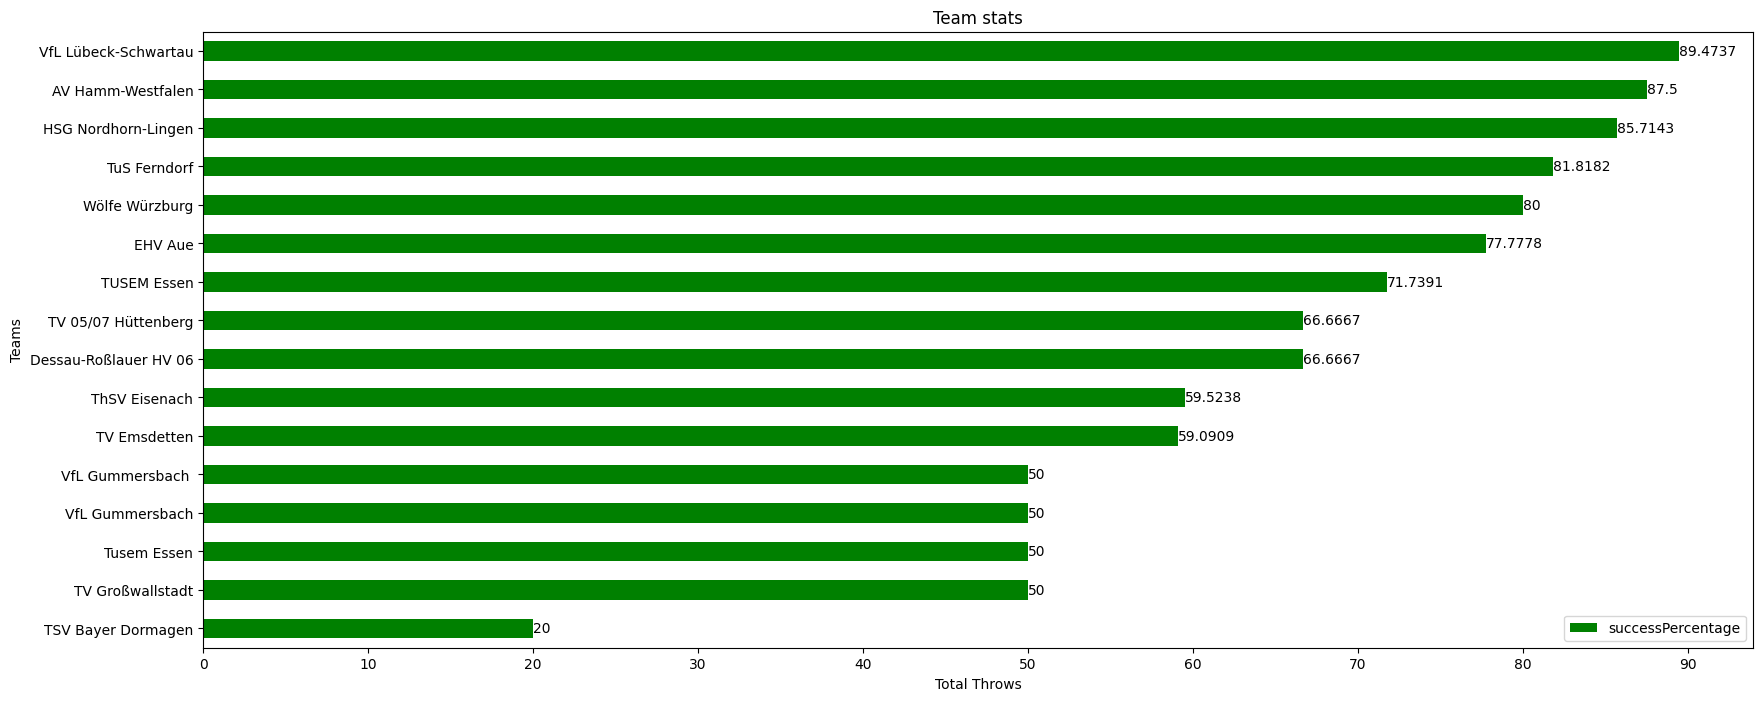

In [43]:
# Teamwise Throw stats
df2 = df.groupby(['homeTeam'])['homeTeam'].count().reset_index(name='TotatlThrows')
df3 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df3 = df3.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="SuccessfulThrows")
df4 = df.loc[(df.throwSuccess == 0)]
df4 = df4.groupby(['homeTeam'])['homeTeam'].count().reset_index(name="FailedThrows")
df5 = pd.merge(df2,df3,on='homeTeam')
df5 = pd.merge(df5,df4,on='homeTeam')
df5['successPercentage'] = (df5['SuccessfulThrows']/df5['TotatlThrows'])*100
print(df5.sort_values('successPercentage',ascending=False))
df5.sort_values('TotatlThrows',ascending=True).set_index('homeTeam')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(8,8) )

ax = df5.sort_values('successPercentage',ascending=True).set_index('homeTeam')[['successPercentage']].plot.barh( title='Team stats',color=("green", "red"),xlabel='Total Throws', ylabel='Teams',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Team & player wise Throw stats

In [44]:
# Team & player wise Throw stats
df6 = df.groupby(['homeTeam','name'])['name'].count().reset_index(name='TotatlThrows')
df7 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df7 = df7.groupby(['homeTeam','name'])['name'].count().reset_index(name="SuccessfulThrows")
df8 = df.loc[(df.throwSuccess == 0)]
df8 = df8.groupby(['homeTeam','name'])['name'].count().reset_index(name="FailedThrows")
df9 = df6.merge(df7,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9 = df9.merge(df8,left_on=['homeTeam','name'],right_on=['homeTeam','name'],  how='left')
df9.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df9['successPercentage'] = (df9['SuccessfulThrows']/df9['TotatlThrows'])*100
df9.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df9.sort_values('name',ascending=False))

,homeTeam,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
0,AV Hamm-Westfalen,Noah Beyer,8,7.0,1.0,87.500000
38,VfL Lübeck-Schwartau,Noah Beyer,5,4.0,1.0,80.000000
35,VfL Gummersbach,Noah Beyer,1,0.0,1.0,0.000000
5,Eulen Ludwigshafen,Noah Beyer,1,0.0,0.0,0.000000
29,TuS Ferndorf,Noah Beyer,4,4.0,0.0,100.000000
26,TV Großwallstadt,Noah Beyer,4,3.0,1.0,75.000000
25,TV Emsdetten,Noah Beyer,9,8.0,1.0,88.888889
20,TUSEM Essen,Noah Beyer,27,24.0,3.0,88.888889
12,HSC 2000 Coburg,Noah Beyer,2,2.0,0.0,100.000000
14,HSG Nordhorn-Lingen,Noah Beyer,10,9.0,1.0,90.000000


Player wise Throw stats

,name,TotatlThrows,SuccessfulThrows,FailedThrows,successPercentage
0,Dirk Holzner,48,42,6,87.500000
3,Noah Beyer,71,61,9,85.915493
1,Fynn Hangstein,77,64,13,83.116883
2,Noah Beyer,32,24,6,75.000000


<AxesSubplot: title={'center': 'Player stats'}, xlabel='Total Throws', ylabel='Player'>

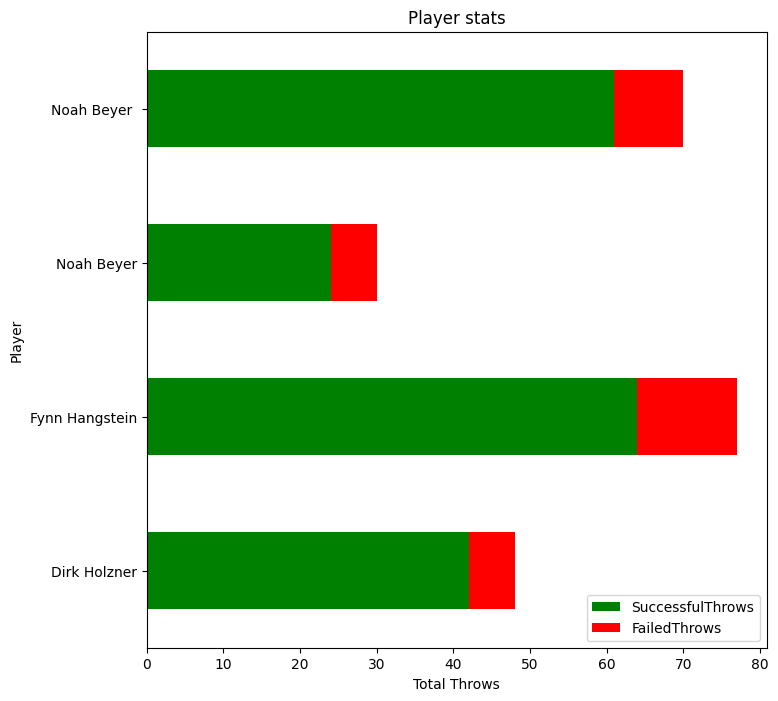

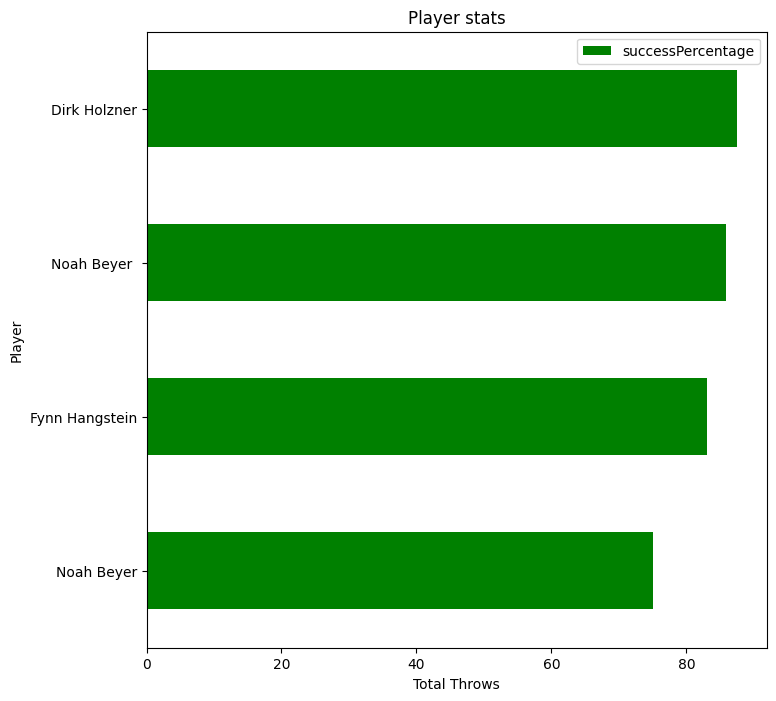

In [45]:
# Player wise Throw stats
df10 = df.groupby(['name'])['name'].count().reset_index(name='TotatlThrows')
df11 = df.loc[(df.throwSuccess == 1) | (df.throwSuccess == 2)]
df11 = df11.groupby(['name'])['name'].count().reset_index(name="SuccessfulThrows")
df12 = df.loc[(df.throwSuccess == 0)]
df12 = df12.groupby(['name'])['name'].count().reset_index(name="FailedThrows")
df13 = pd.merge(df10,df11,on=['name'])
df13 = pd.merge(df13,df12,on=['name'])
df13.replace(np.nan, 0.0, inplace=True)
#df9.drop(columns=['homeTeam_x','homeTeam_y'])
df13['successPercentage'] = (df13['SuccessfulThrows']/df13['TotatlThrows'])*100
df13.sort_values('name',ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df13.sort_values('successPercentage',ascending=False))
    
df13.set_index('name')[['SuccessfulThrows','FailedThrows']].plot.barh(stacked=True, title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(8,8) )

df13.sort_values('successPercentage',ascending=True).set_index('name')[['successPercentage']].plot.barh( title='Player stats',color=("green", "red"),xlabel='Total Throws', ylabel='Player',figsize=(8,8) )

Throw Success based on lastTrow Success

174
bothSuccess: 134
bothFailed: 2
failedButLastSuccess: 25
successButLastFailed: 13
------------------------------
bothNachwurf: 0
successLastNachwurf: 5
failedLastNachwurf: 0


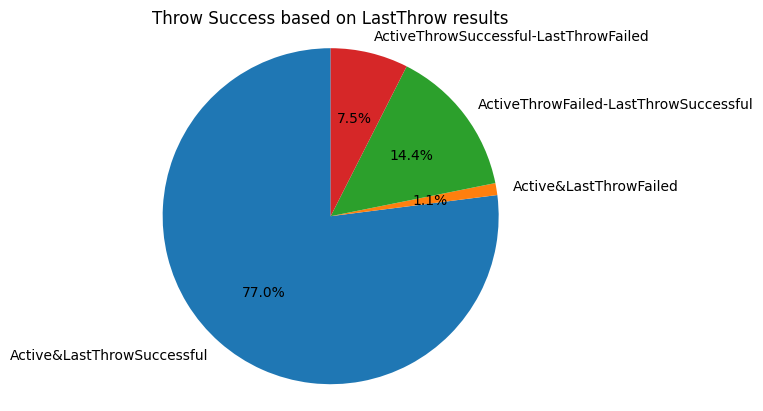

In [46]:
df14 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df14.dropna(inplace=True)
df14.replace(to_replace=2.0, value=1.0, inplace=True)
print(df14.count()[0])
bothSuccess = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 1)].count()[0]
print('bothSuccess: '+ str(bothSuccess))
bothFailed = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 0)].count()[0]
print('bothFailed: '+ str(bothFailed))
failedButLastSuccess = df14[(df14.throwSuccess == 0) & (df14.lastThrowSuccess == 1)].count()[0]
print('failedButLastSuccess: '+ str(failedButLastSuccess))    
successButLastFailed = df14[(df14.throwSuccess == 1) & (df14.lastThrowSuccess == 0)].count()[0] 
print('successButLastFailed: '+ str(successButLastFailed)) 

print('------------------------------')
df15 = df.loc[:,('throwSuccess','lastThrowSuccess')]
df15.dropna(inplace=True)
bothNachwurf = df15[(df15.throwSuccess == 2) & (df15.lastThrowSuccess == 2)].count()[0]
print('bothNachwurf: '+ str(bothNachwurf))
successLastNachwurf = df15[(df15.throwSuccess == 1) & (df15.lastThrowSuccess == 2)].count()[0]
print('successLastNachwurf: '+ str(successLastNachwurf))
failedLastNachwurf = df15[(df15.throwSuccess == 0) & (df15.lastThrowSuccess == 2)].count()[0]
print('failedLastNachwurf: '+ str(failedLastNachwurf))

labels = ['Active&LastThrowSuccessful','Active&LastThrowFailed','ActiveThrowFailed-LastThrowSuccessful','ActiveThrowSuccessful-LastThrowFailed']
values = [bothSuccess,bothFailed,failedButLastSuccess,successButLastFailed]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Throw Success based on LastThrow results')
plt.show()

Throw analysis fo L-R players

In [47]:
df15 = df.loc[:,('throwSuccess','LRHandy')]
df15.dropna(inplace=True)
df15['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
noOfThrowsFromR = df15[ (df15.LRHandy == 1)].count()[0]
print('noOfThrowsFromR: '+ str(noOfThrowsFromR))
noOfThrowsFromL = df15[ (df15.LRHandy == 2)].count()[0]
print('noOfThrowsFromL: '+ str(noOfThrowsFromL)),

print('------------------')

successR = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 1)].count()[0]
print('successR: '+ str(successR))

successL = df15[(df15.throwSuccess == 1) & (df15.LRHandy == 2)].count()[0]
print('successL: '+ str(successL))

failedR = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 1)].count()[0]
print('failedR: '+ str(failedR))

failedL = df15[(df15.throwSuccess == 0) & (df15.LRHandy == 2)].count()[0]
print('failedL: '+ str(failedL))


print('----------------------')
print('%successR: '+ str((successR/noOfThrowsFromR)*100))
print('%successL: '+ str((successL/noOfThrowsFromL)*100))



noOfThrowsFromR: 225
noOfThrowsFromL: 0
------------------
successR: 191
successL: 0
failedR: 34
failedL: 0
----------------------
%successR: 84.88888888888889
%successL: nan


/var/folders/zq/n748bt1s4fdbgrfv7nj7s2n80000gn/T/ipykernel_16343/287796995.py:26: RuntimeWarning: invalid value encountered in long_scalars
  print('%successL: '+ str((successL/noOfThrowsFromL)*100))


Throw Analysis based on pressure situation

                                    pressureSituation  throwSuccess  Count
0                               No Pressure Situation           0.0     22
1                               No Pressure Situation           1.0    115
2                                    GoalKeeperChange           0.0      6
3                                    GoalKeeperChange           1.0     27
4                                     LastThrowFailed           0.0      2
5                                     LastThrowFailed           1.0     14
6                  GoalDiffLessEqualTo4After50MinPlay           0.0      3
7                  GoalDiffLessEqualTo4After50MinPlay           1.0     21
8                    GoalKeeperChange-LastThrowFailed           1.0      3
9   GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...           1.0      7
10  LastThrowFailed-GoalDiffLessEqualTo4After50Min...           0.0      1
11  LastThrowFailed-GoalDiffLessEqualTo4After50Min...           1.0      1
12                       

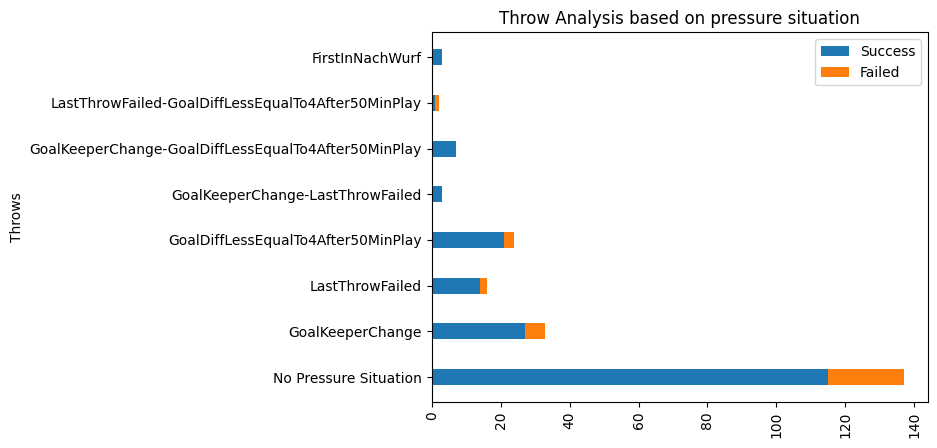

In [48]:
df16 = df.loc[:,('pressureSituation','throwSuccess')]
df16['throwSuccess'].replace(2,1, inplace=True)
df16.dropna(inplace=True)
df16 = df16.groupby(['pressureSituation','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df16

X = ['No Pressure Situation','GoalKeeperChange','LastThrowFailed',
     'GoalDiffLessEqualTo4After50MinPlay','GoalKeeperChange-LastThrowFailed',
     'GoalKeeperChange-GoalDiffLessEqualTo4After50MinPlay','LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'GoalKeeperChange-LastThrowFailed-GoalDiffLessEqualTo4After50MinPlay',
     'FirstInNachWurf']

for val in df16['pressureSituation']:
     df16['pressureSituation'].replace(val,X[int(val)], inplace=True)


print(df16)
grp = df16['pressureSituation'].unique()
s = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 1.0)]
     if tempdf.empty:
          s.append(0.0)
     else:
          s.append(tempdf.iloc[0,2])
f = list()
for g in grp:
     tempdf = df16[(df16.pressureSituation == g) & (df16.throwSuccess == 0.0)]
     if tempdf.empty:
          f.append(0)
     else:
          f.append(tempdf.iloc[0,2])
t = list()
for g in grp:
     t.append(df16[(df16.pressureSituation == g)]['Count'].sum())


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(grp, s, width,  label='Success')
ax.barh(grp, f, width,  left=s,
       label='Failed')

ax.set_ylabel('Throws')
#ax.set_xscale('log')
ax.set_title('Throw Analysis based on pressure situation')
ax.legend()
plt.xticks(rotation=90)
plt.show()

                                   PressureSituation  successPercentage
0                              No Pressure Situation          83.941606
1                                   GoalKeeperChange          81.818182
2                                    LastThrowFailed          87.500000
3                 GoalDiffLessEqualTo4After50MinPlay          87.500000
4                   GoalKeeperChange-LastThrowFailed         100.000000
5  GoalKeeperChange-GoalDiffLessEqualTo4After50Mi...         100.000000
6  LastThrowFailed-GoalDiffLessEqualTo4After50Min...          50.000000
7                                    FirstInNachWurf         100.000000


[Text(0, 0, '50'),
 Text(0, 0, '81.8182'),
 Text(0, 0, '83.9416'),
 Text(0, 0, '87.5'),
 Text(0, 0, '87.5'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100')]

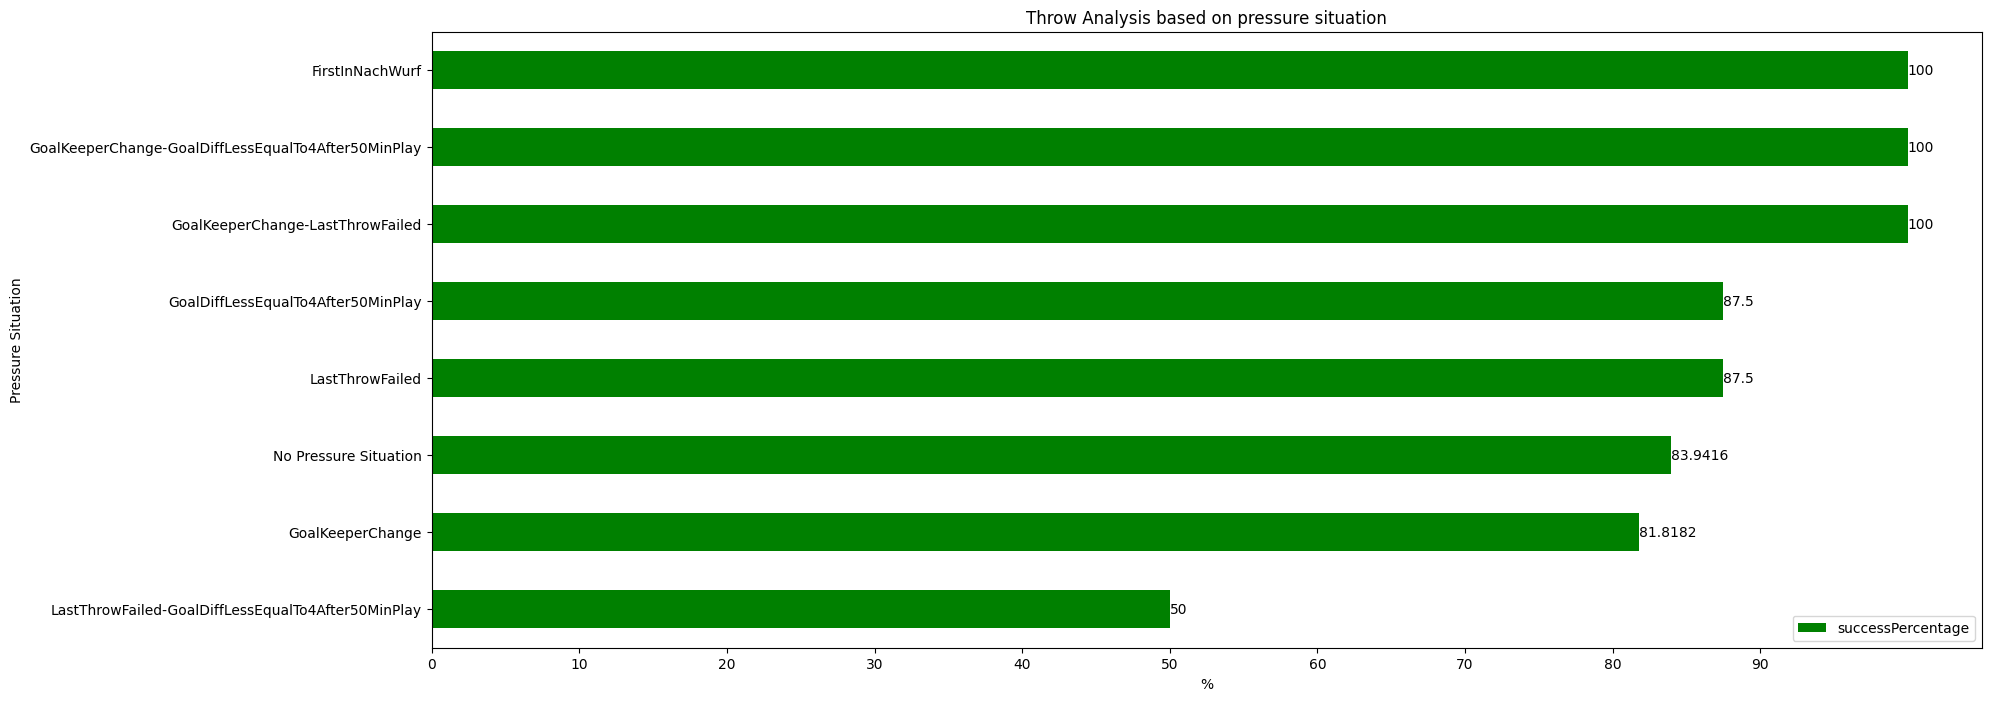

In [49]:

pressureSituation = pd.DataFrame({'PressureSituation':grp,'successPercentage':[(se/te)*100 for se, te in zip(s, t)]})
print(pressureSituation)
ax = pressureSituation.sort_values('successPercentage',ascending=True).set_index('PressureSituation')[['successPercentage']].plot.barh( title='Throw Analysis based on pressure situation',color=("green", "red"),xlabel='%', ylabel='Pressure Situation',figsize=(20,8),xticks=range(0,100,10) )
ax.bar_label(ax.containers[0])

Throw Direction

,throwDirection,throwSuccess,Count
0,1.0,0.0,2
1,1.0,1.0,22
2,2.0,0.0,4
3,2.0,1.0,7
4,3.0,0.0,3
5,3.0,1.0,21
6,4.0,0.0,1
7,4.0,1.0,6
8,5.0,1.0,1
9,6.0,0.0,2


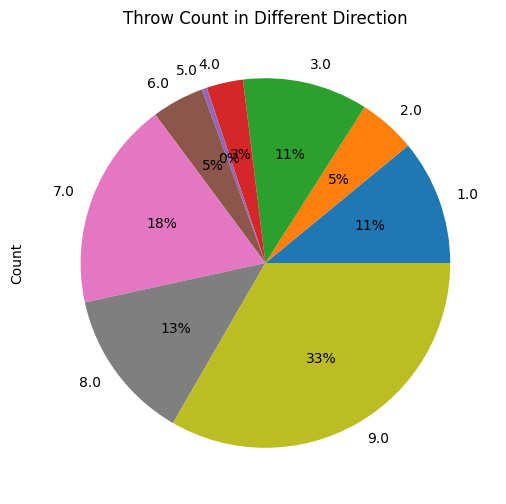

In [50]:


df17 = df.loc[:,('throwDirection','throwSuccess')]
df17.dropna(inplace=True)
df17['throwSuccess'].replace(to_replace=2.0, value=1.0, inplace=True)
df18 = df17.copy()
df18 = df18.groupby(['throwDirection'])['throwSuccess'].count().reset_index(name='Count')
df18.set_index('throwDirection').plot.pie(y='Count', figsize=(6, 6), title='Throw Count in Different Direction',autopct='%.0f%%',legend=None)
df17 = df17.groupby(['throwDirection','throwSuccess'])['throwSuccess'].count().reset_index(name='Count')
df17.sort_values(['throwDirection'],ascending=True,inplace=True)
df17

Text(0.5, 1.0, '9')

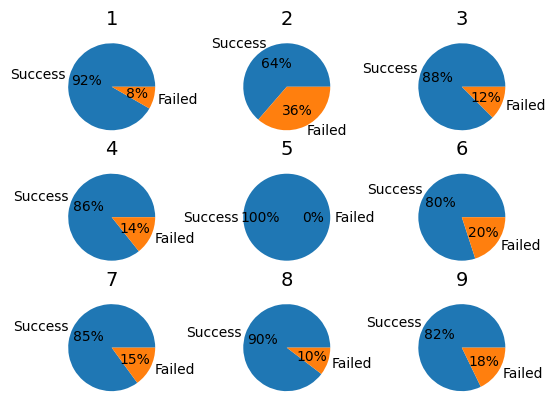

In [51]:
# Some data
labels = 'Success', 'Failed'

# Make figure and axes
fig, axs = plt.subplots(3, 3)

axs[0, 0].pie([22,2], labels=labels, autopct='%.0f%%' )
axs[0, 0].set_title('1', fontsize=14)
axs[0, 1].pie([7,4], labels=labels, autopct='%.0f%%')
axs[0, 1].set_title('2', fontsize=14)
axs[0, 2].pie([21,3], labels=labels,  autopct='%.0f%%')
axs[0, 2].set_title('3', fontsize=14)

axs[1, 0].pie([6,1], labels=labels, autopct='%.0f%%')
axs[1, 0].set_title('4', fontsize=14)
axs[1, 1].pie([1,0], labels=labels,  autopct='%.0f%%')
axs[1, 1].set_title('5', fontsize=14)
axs[1, 2].pie([8,2], labels=labels, autopct='%.0f%%')
axs[1, 2].set_title('6', fontsize=14)

axs[2, 0].pie([34,6], labels=labels,  autopct='%.0f%%')
axs[2, 0].set_title('7', fontsize=14)
axs[2, 1].pie([26,3], labels=labels, autopct='%.0f%%')
axs[2, 1].set_title('8', fontsize=14)
axs[2, 2].pie([60,13], labels=labels,  autopct='%.0f%%')
axs[2, 2].set_title('9', fontsize=14)
